# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [6]:
X_train = pd.read_csv('https://raw.githubusercontent.com/thiagoafcf/projetos-cdd-ebac/main/Modulo%2021/X_train_balanced.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/thiagoafcf/projetos-cdd-ebac/main/Modulo%2021/y_train_balanced.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/thiagoafcf/projetos-cdd-ebac/main/Modulo%2021/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/thiagoafcf/projetos-cdd-ebac/main/Modulo%2021/y_test.csv')

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 252 non-null    int64  
 1   Income              252 non-null    float64
 2   Number of Children  252 non-null    int64  
 3   Gender              252 non-null    int64  
 4   Home Ownership      252 non-null    int64  
 5   Education           252 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 11.9 KB


In [8]:
X_train.head()

,Age,Income,Number of Children,Gender,Home Ownership,Education
0,26,45000.0,0,0,0,1
1,29,27500.0,0,0,0,0
2,25,62500.0,0,0,0,2
3,29,68000.0,2,0,1,4
4,31,65000.0,0,1,0,2


In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 41 non-null     int64  
 1   Income              41 non-null     float64
 2   Number of Children  41 non-null     int64  
 3   Gender              41 non-null     int64  
 4   Home Ownership      41 non-null     int64  
 5   Education           41 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 2.1 KB


In [10]:
X_test.head()

,Age,Income,Number of Children,Gender,Home Ownership,Education
0,25,55000.0,0,0,0,2
1,48,87500.0,1,0,1,4
2,26,55000.0,1,0,1,2
3,39,62500.0,2,0,1,2
4,35,90000.0,1,0,1,4


In [11]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Credit Score  252 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [12]:
y_train.head()

,Credit Score
0,1
1,0
2,1
3,1
4,1


In [13]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Credit Score  41 non-null     int64
dtypes: int64(1)
memory usage: 460.0 bytes


In [14]:
y_test.head()

,Credit Score
0,1
1,2
2,1
3,2
4,2


In [15]:
y_train.value_counts()

,count
Credit Score,
0,84
1,84
2,84


In [16]:
y_test.value_counts()

,count
Credit Score,
2,29
0,6
1,6


Com base nas informações acima, é possível afirmar que:
- Os tamanhos das bases de treino e teste estão compatíveis;
- Os tipos das variáveis estão corretos;
- As bases não apresentam dados nulos;
- As bases Y contém somente a variável-alvo;
- As bases de treino estão balanceadas, mas as de teste não.

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Primeiramente deve ser feita obtenção dos dados, o devido tratamento e preparação e a separação destes em bases de treino e teste.
É feita a importação das bibilotecas necessárias (destaca-se a DecisionTreeClassifier da SciKit Learn) e o upload das bases.

Em seguida, cria-se a instância com o modelo e realiza-se o treino com as bases de treino. O próximo passo é fazer uma previsão com a base de treino, obter as métricas, plotar o gráfico da árvore e avaliar os resultados.

Faz-se uma previsão com base de teste, obtem-se as métricas e as compara com as da base de treino.

A partir dessa avaliação conjunta, é possível fazer o fine tunning de parâmetros do modelo, verificar se o modelo performa melhor com menos features ou com redução de sua profundidade, além de outras técnicas.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modelo com os dados de treino.

In [18]:
arvore_credit_score = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_credit_score.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [19]:
previsao_treino = arvore_credit_score.predict(X_train)

In [20]:
acuracia_treino = accuracy_score(y_train, previsao_treino)
print(f'Acurácia do modelo com os dados de treino: {acuracia_treino}')

Acurácia do modelo com os dados de treino: 1.0


In [21]:
relatorio_treino = classification_report(y_train, previsao_treino)
print(f'Relatório do modelo com os dados de treino: \n{relatorio_treino}')

Relatório do modelo com os dados de treino: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [22]:
matriz_confusao_treino = confusion_matrix(y_train, previsao_treino)
print(f'Matriz de confusão (treino): \n{matriz_confusao_treino}')

Matriz de confusão (treino): 
[[84  0  0]
 [ 0 84  0]
 [ 0  0 84]]


O modelo obteve um resultado perfeito utilizando a base de treino. Não foram encontrados erros entre sua previsão e a base com a variável-alvo. Ele, portanto, se ajustou muito bem aos dados. Porém, ainda é necessário verificar um possível overfitting.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [23]:
previsao_teste = arvore_credit_score.predict(X_test)

In [24]:
acuracia_teste = accuracy_score(y_test, previsao_teste)
print(f'Acurácia do modelo com os dados de teste: {acuracia_teste}')

Acurácia do modelo com os dados de teste: 0.975609756097561


In [25]:
relatorio_teste = classification_report(y_test, previsao_teste)
print(f'Relatório do modelo com os dados de teste: \n{relatorio_teste}')

Relatório do modelo com os dados de teste: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



In [26]:
matriz_confusao_teste = confusion_matrix(y_test, previsao_teste)
print(f'Matriz de confusão (teste): \n{matriz_confusao_teste}')

Matriz de confusão (teste): 
[[ 6  0  0]
 [ 0  6  0]
 [ 0  1 28]]


Com a base de testes, o modelo conseguiu um resultado muito satisfatório de 97,6% de acurácia. Entretanto, deve-se ter cautela ao avaliar essa métrica, pois a base de testes é desbalanceada. Então, a avaliação individual de cada classe, especialmente das minoritárias, é fundamental devido ao peso que cada uma delas pode ter na métrica de acurácia.

O precision, recall e f1 score da classe 0, foi perfeito. Para a outra classe minoritária, a classe 1, há um resultado um pouco inferior em precision e f1 score. Levanta um alerta para a capacidade do modelo de prever corretamente esses casos.

A classe 2, majoritária, apresentou resultados bons, mas devemos levar em consideração também a matriz de confusão.

Observando a matriz de confusão, vemos que houve um erro de classificação de um classe 2 como um classe 1. Considerando que a classe mais sensível para o negócio seriam aqueles com credit score baixo (classe 0) e que o erro se deu de uma classificação de alto para médio, pode-se considerar que não é um erro crítico.

Entretanto, a perda em acurácia e demais métricas em relação ao apurado com a base de treino nos indica que houve overfitting no modelo. Seria importante testar o modelo com um número maior de dados que não foram utilizados para treinamento a fim de verificar com melhor assertividade a sua capacidade de generalização.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

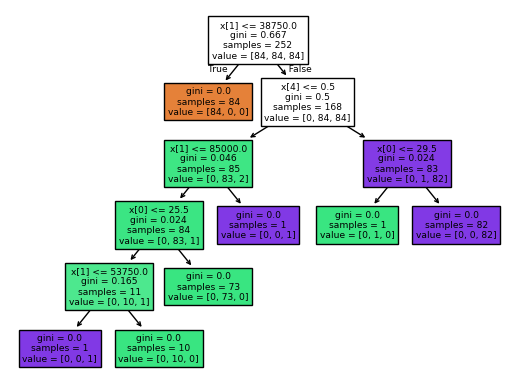

Profundidade da árvore: 5


In [27]:
plot_tree(arvore_credit_score, filled=True)
plt.show()
print(f"Profundidade da árvore: {arvore_credit_score.get_depth()}")

É possível fazer uma avaliação visual. Por ter uma profundidade de 5, a visualização dos nós da árvore é fácil e os critérios utilizados em cada são legíveis.

# 6) Identifique as 2 principais features do modelo.


In [46]:
importancias_features = arvore_credit_score.feature_importances_
indices = np.argsort(importancias_features)[::-1]
nomes_features = X_train.columns

print("Ranking de importância das features: \n")
for i in range(X_train.shape[1]):
    print(f"{i + 1}. {nomes_features[indices[i]]} ({importancias_features[indices[i]]:.3f})")

Ranking de importância das features: 

1. Income (0.522)
2. Home Ownership (0.465)
3. Age (0.013)
4. Education (0.000)
5. Number of Children (0.000)
6. Gender (0.000)


# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [29]:
X_train_top2 = X_train[['Income', 'Home Ownership']]
X_test_top2 = X_test[['Income', 'Home Ownership']]

In [30]:
X_train_top2.head()

,Income,Home Ownership
0,45000.0,0
1,27500.0,0
2,62500.0,0
3,68000.0,1
4,65000.0,0


In [31]:
X_test_top2.head()

,Income,Home Ownership
0,55000.0,0
1,87500.0,1
2,55000.0,1
3,62500.0,1
4,90000.0,1


In [32]:
arvore_credit_score_top2 = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_credit_score_top2.fit(X_train_top2, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
previsao_treino_top2 = arvore_credit_score_top2.predict(X_train_top2)

In [34]:
relatorio_treino_top2 = classification_report(y_train, previsao_treino_top2)
print(f'Relatório do modelo com as 2 principais features (treino): \n{relatorio_treino_top2}')

Relatório do modelo com as 2 principais features (treino): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.99      1.00      0.99        84
           2       1.00      0.99      0.99        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [35]:
matriz_confusao_treino_top2 = confusion_matrix(y_train, previsao_treino_top2)
print(f'Matriz de confusão do modelo com as 2 principais features (treino): \n{matriz_confusao_treino_top2}')

Matriz de confusão do modelo com as 2 principais features (treino): 
[[84  0  0]
 [ 0 84  0]
 [ 0  1 83]]


In [36]:
previsao_teste_top2 = arvore_credit_score_top2.predict(X_test_top2)

In [37]:
relatorio_teste_top2 = classification_report(y_test, previsao_teste_top2)
print(f'Relatório do modelo com as 2 principais features (teste): \n{relatorio_teste_top2}')

Relatório do modelo com as 2 principais features (teste): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



In [38]:
matriz_confusao_teste_top2 = confusion_matrix(y_test, previsao_teste_top2)
print(f'Matriz de confusão do modelo com as 2 principais features (teste): \n{matriz_confusao_teste_top2}')

Matriz de confusão do modelo com as 2 principais features (teste): 
[[ 6  0  0]
 [ 0  5  1]
 [ 0  1 28]]


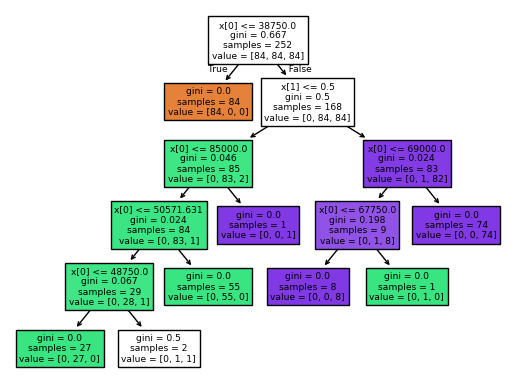

Profundidade da árvore: 5


In [39]:
plot_tree(arvore_credit_score_top2, filled=True)
plt.show()
print(f"Profundidade da árvore: {arvore_credit_score_top2.get_depth()}")

Houve piora nas métricas com as bases de treino e teste em relação ao obtido utilizando as bases com todas as features, apesar de o resultado ainda ser bom. Verifica-se também overfitting.

Pode-se concluir que apesar de ter uma importância menor, a variável Age não tem um papel desprezível para o modelo ter uma melhor capacidade de previsão. Isso pode ser também verificado ao analisar o gráfico da árvore do modelo completo, na qual essa variável é utilizada em alguns dos nós como critério.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

O modelo de árvore de decisão com a base completa teve um resultado superior ao obtido com a técnica de Naive Bayes. Para fins de comparação, cito as métricas do modelo de Naive Bayes:
- Acurácia com dados de treino: 97,6%
- Recall com dados de treino: 97,6%
- Matriz de Confusão com dados de treino:
       [82,  2,  0],
       [ 1, 82,  1],
       [ 0,  2, 82]

- Acurácia com dados de teste: 97,6%
- Recall com dados de teste: 94,4%
- Matriz de Confusão com dados de teste:
       [ 5,  1,  0],
       [ 0,  6,  0],
       [ 0,  0, 29]

O modelo com a árvore de decisão apresentou uma melhor adequação aos dados, melhor sensibilidade e melhor precisão. Além disso, o modelo de árvore de decisão não teve erros críticos, enquanto que o de Naive Bayes apresentou um erro crítico para o negócio.